<center style="color:red;font-size:50px;font-family:courier">Prediction Diabetes Using Machine Learning And Deep Learning </center>

<center><h1 style='font-family:courier'>Objective:Feature extraction and exploratory data analysis on dataset.Applied machine learning algorithms on the dataset and predict the output for the diabetes</h1></center>

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Import Libraries</h1></center>

In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [100]:
data=pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Data processing and cleaning</h1></center>

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [102]:
data.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [103]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [104]:
data.shape

(100000, 9)

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Exploratory data analysis</h1></center>

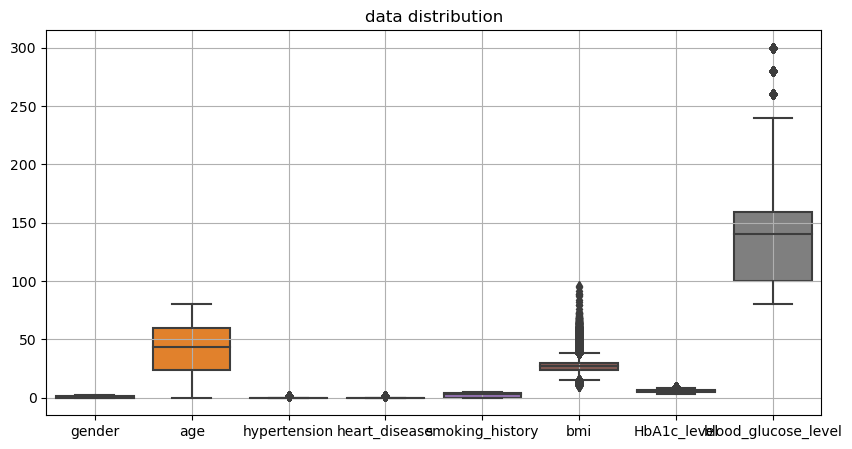

In [171]:
plt.figure(figsize=(10,5))
sns.boxplot(data.drop('diabetes',axis=1))
plt.title("data distribution")
plt.grid()

In [106]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [107]:
new_data=data[data['diabetes']==1]

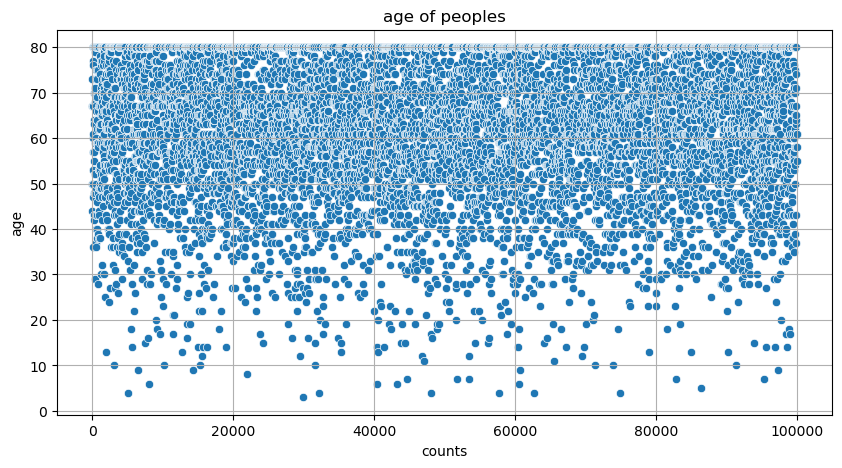

In [170]:
plt.figure(figsize=(10,5))
sns.scatterplot(new_data['age'])
plt.xlabel("counts")
plt.ylabel("age")
plt.title("age of peoples")
plt.grid()

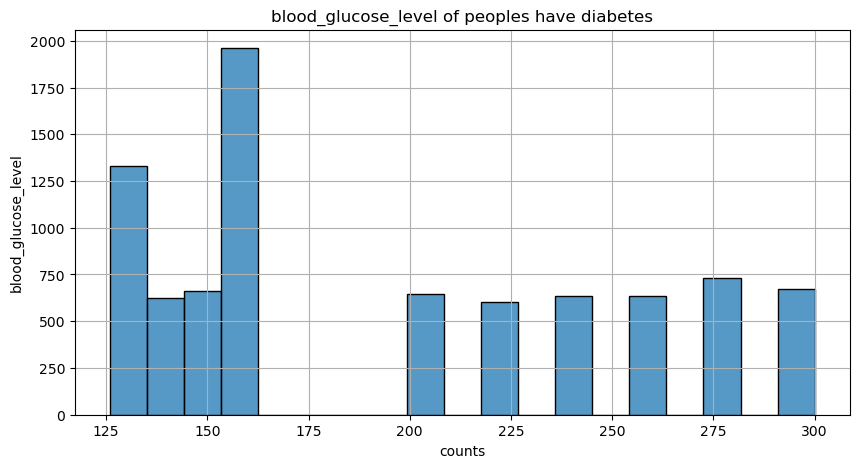

In [169]:
plt.figure(figsize=(10,5))
sns.histplot(new_data['blood_glucose_level'])
plt.xlabel("counts")
plt.ylabel("blood_glucose_level")
plt.title("blood_glucose_level of peoples have diabetes")
plt.grid()

In [110]:
smoking_counts=(data['smoking_history'].value_counts())
smoking_counts

list1=list((smoking_counts.keys()))

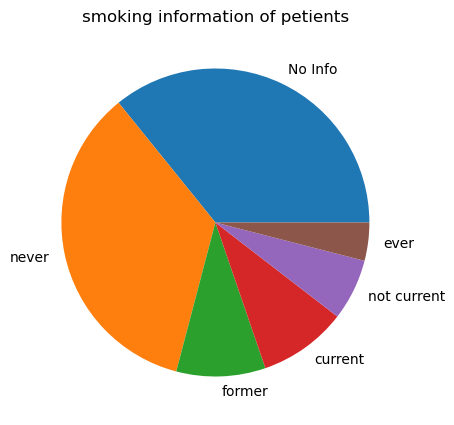

In [111]:

plt.figure(figsize=(10,5))
smoking_counts=list(data['smoking_history'].value_counts())
#print(smoking_counts)
plt.pie(smoking_counts,labels=list1)
plt.title("smoking information of petients")
plt.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Label Encoding</h1></center>

In [112]:
model=LabelEncoder()
data['gender']=model.fit_transform(data['gender'])
data['smoking_history']=model.fit_transform(data['smoking_history'])

In [113]:
data

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Data spilting and training model</h1></center>

In [114]:
x=data.drop('diabetes',axis=1)
y=data['diabetes']

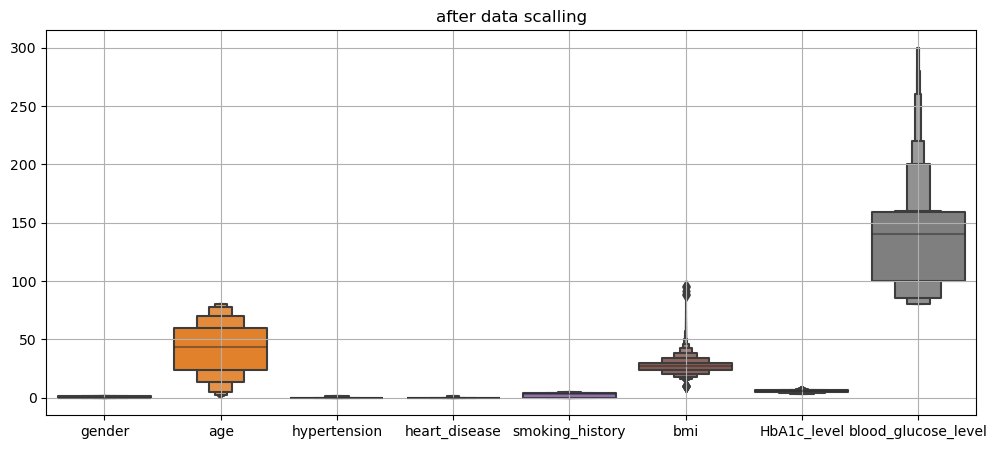

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)

model=StandardScaler()
model.fit_transform(x_train)
model.fit_transform(x_test)

plt.figure(figsize=(12,5))

sns.boxenplot(x_train)

plt.title("after data scalling")

plt.grid()

plt.show()

In [116]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=4)
components = pca.fit_transform(x)


total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data['diabetes'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Logistic Regression</h1></center>

In [117]:
model=LogisticRegression()

model.fit(x_train,y_train)

print("score",model.score(x_test,y_test))

score 0.9521


Text(0.5, 1.0, 'confusion matrix for Logistic regression')

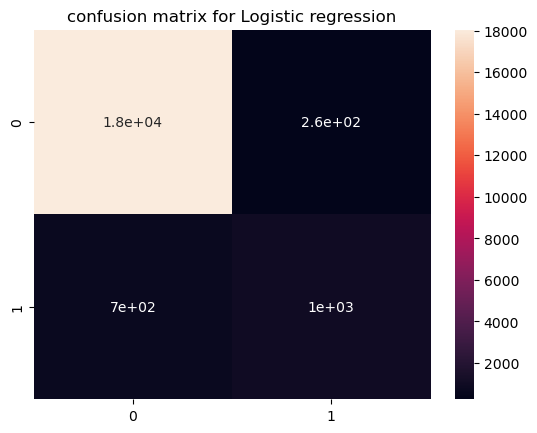

In [118]:
pred=model.predict(x_test)

cn=confusion_matrix(y_test,pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Logistic regression")

In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18299
           1       0.80      0.59      0.68      1701

    accuracy                           0.95     20000
   macro avg       0.88      0.79      0.82     20000
weighted avg       0.95      0.95      0.95     20000



In [120]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>KNeighborsClassifier</h1></center>

In [121]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9545

In [122]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18299
           1       0.88      0.54      0.67      1701

    accuracy                           0.95     20000
   macro avg       0.92      0.77      0.82     20000
weighted avg       0.95      0.95      0.95     20000



In [123]:
from sklearn.metrics import roc_curve
fpr2, tpr2, thresh2 = roc_curve(y_test, pred, pos_label=1)

Text(0.5, 1.0, 'confusion matrix for KNeighborsClassifier')

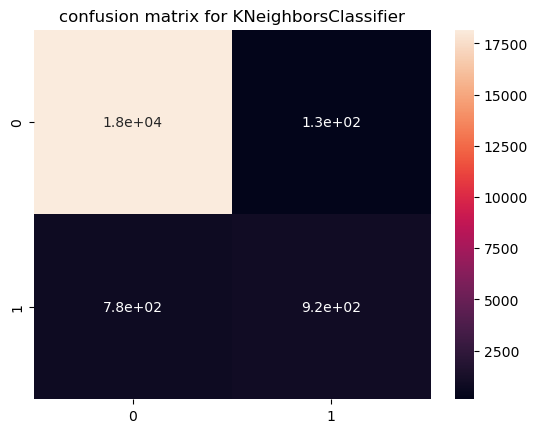

In [124]:
cn=confusion_matrix(y_test,pred)

sns.heatmap(cn,annot=True)
plt.title("confusion matrix for KNeighborsClassifier")

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Random forest regressor</h1></center>

In [125]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


model.fit(x_train,y_train)


print(model.score(x_test,y_test))



0.9708


<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Grid Search CV</h1></center>

In [126]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_estimators':np.arange(2,10),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,5),
         'min_samples_leaf':np.arange(1,5),
         'min_samples_split':np.arange(2,5),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestClassifier()

rf_hyper_model=RandomizedSearchCV(rf_model,params)

In [127]:
rf_hyper_model.fit(x_train,y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [10]})

In [128]:
rf_hyper_model.best_params_ 

{'random_state': 10,
 'n_estimators': 7,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'entropy'}

In [129]:
rf_hyper_model.score(x_test,y_test)

0.97245

In [130]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18299
           1       0.96      0.69      0.80      1701

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [131]:
from sklearn.metrics import roc_curve
fpr3, tpr3, thresh3 = roc_curve(y_test, pred, pos_label=1)

Text(0.5, 1.0, 'confusion matrix for grid search cv')

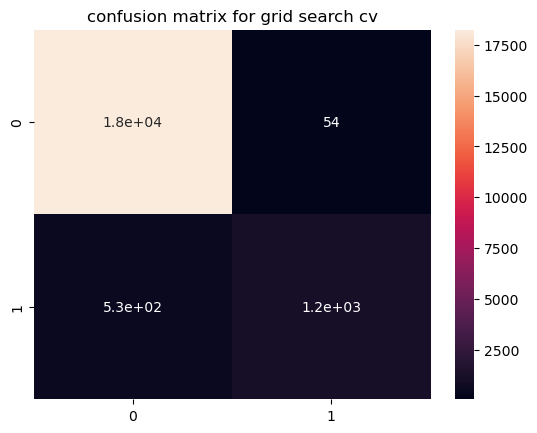

In [132]:
cn=confusion_matrix(y_test,pred)

sns.heatmap(cn,annot=True)
plt.title("confusion matrix for grid search cv")

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Ada Boost Classifier</h1></center>

In [133]:
from sklearn.ensemble import AdaBoostClassifier

regr = AdaBoostClassifier(random_state=0, n_estimators=1000)
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

pred=regr.predict(x_test)

0.97215


In [134]:
print(classification_report(y_test,pred))

from sklearn.metrics import roc_curve
fpr4, tpr4, thresh4 = roc_curve(y_test, pred, pos_label=1)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18299
           1       0.97      0.70      0.81      1701

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



Text(0.5, 1.0, 'confusion matrix for ada boost')

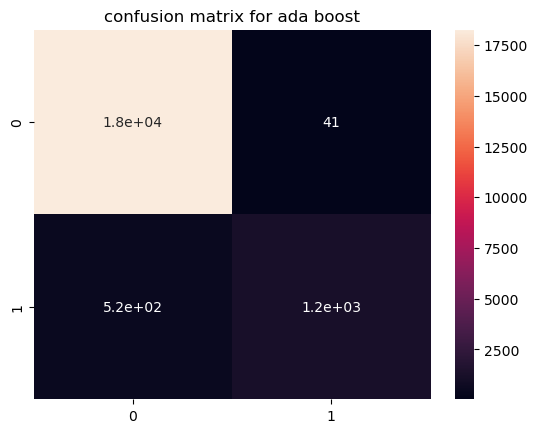

In [135]:
cn=confusion_matrix(y_test,pred)

sns.heatmap(cn,annot=True)
plt.title("confusion matrix for ada boost")

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Gradient Boosting Classifier</h1></center>

In [136]:
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)

print(regr.score(x_test, y_test))

pred=regr.predict(x_test)

0.97215


In [138]:
print(classification_report(y_test,pred))

from sklearn.metrics import roc_curve
fpr5, tpr5, thresh5 = roc_curve(y_test, pred, pos_label=1)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18299
           1       0.97      0.70      0.81      1701

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



Text(0.5, 1.0, 'confusion matrix for gradient boost')

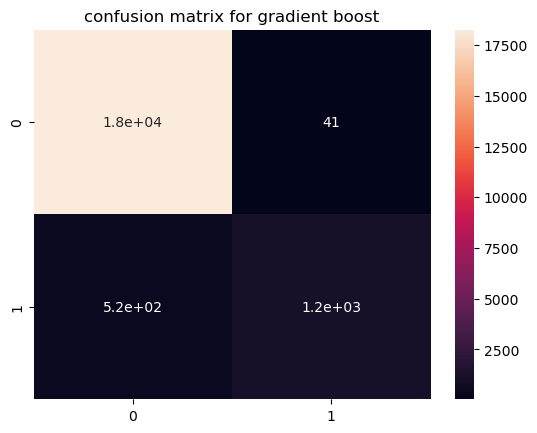

In [139]:
cn=confusion_matrix(y_test,pred)

sns.heatmap(cn,annot=True)
plt.title("confusion matrix for gradient boost")

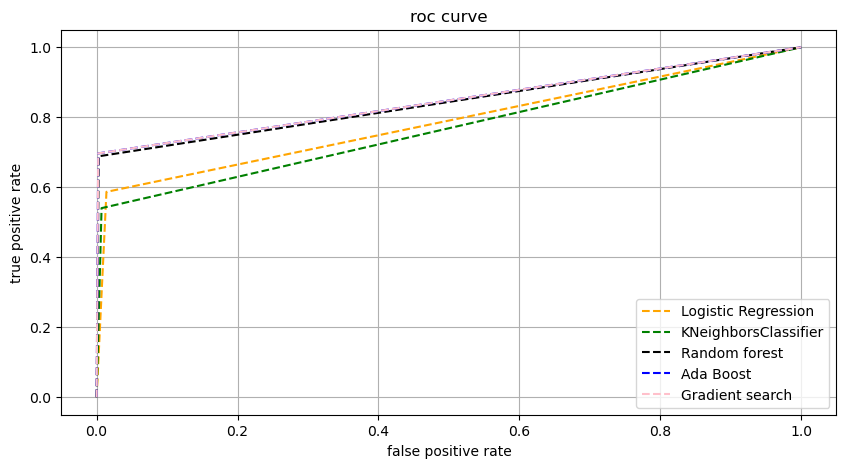

In [167]:
plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNeighborsClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Random forest')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Ada Boost')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Gradient search')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.title("roc curve")
plt.grid()
plt.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Tensorflow</h1></center>

In [141]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [161]:
model=Sequential()

model.add(Dense(7,activation="relu",input_dim=8))
model.add(Dense(7,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(28,activation="relu"))


model.add(Dense(1,activation="sigmoid"))# for regression problem output activation is linear

In [162]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 63        
                                                                 
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 14)                112       
                                                                 
 dense_9 (Dense)             (None, 28)                420       
                                                                 
 dense_10 (Dense)            (None, 1)                 29        
                                                                 
Total params: 680
Trainable params: 680
Non-trainable params: 0
_________________________________________________________________


In [163]:
model.compile(loss="binary_crossentropy",optimizer="Adam")

In [164]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)
pred=model.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,pred)

Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2811 - val_loss: 0.1931
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1815 - val_loss: 0.1644
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1522 - val_loss: 0.1391
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1304 - val_loss: 0.1141
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1181 - val_loss: 0.1079
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1152 - val_loss: 0.1076
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1129 - val_loss: 0.1041
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1116 - val_loss: 0.1017
Epoch 9/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1119 - val_loss: 0.1038
Epoch 10/10
625/625 [==============================] - 1s 1ms/step


0.5626804729447041

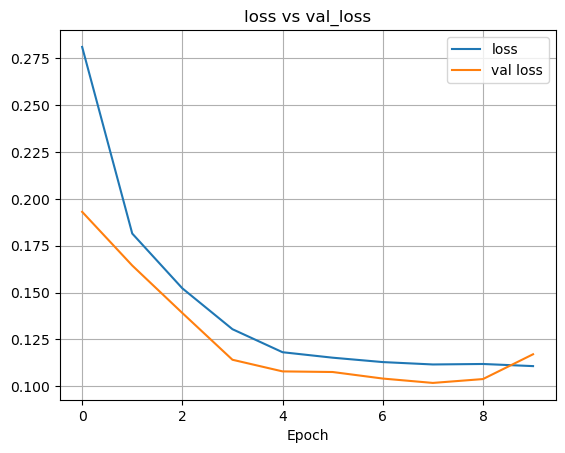

In [173]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val loss")
plt.title("loss vs val_loss")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Conclusion: Random forest have the higher accuracy among all other algorithns</h1></center>

<center><h1 style='background-color: #ff9966;padding:10px;font-family:courier'>Thank You,If You Like Please Upvote</h1></center>